# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# 'MEDV' is already stored in prices, so you don't need to call it using prices['MEDV']
## ADJUSTMENT: Changed pandas to np function, because np uses the whole population and pandas only the standard deviation.

# DONE: Minimum price of the data
minimum_price = np.min(prices)

# DONE: Maximum price of the data
maximum_price = np.max(prices)

# DONE: Mean price of the data
mean_price = np.mean(prices)

# DONE: Median price of the data
median_price = np.median(prices)

# DONE: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

> * I would expect, that a home with more rooms is more likely to increase the **'MEDV'** than a home with less rooms.  
My assumption is that usually more rooms need more space, more space is more expensive, so the value will increase.
* I assume that a lower _working_ class as owners in the neighborhood will decrease the values of the property.  
Usually when there is an area with more low earners or factories and factory workers (and yes, the further assumption is that a worker is more likely to live close to the workplace more outside of the city, in the industrial areas), **'MEDV'** is more likely to decrease.
* Last but not least, the ratio regarding Schools close by called **'PTRATIO'**.  
This is a bit tricky.  
So if we have a ratio of 10 it means, we have 10 students for 1 teacher. A value of 15, tells us 15 students for 1 teacher.  
My assumption is, that the price will decrease with an increasing value, so it's like the **'LSTAT'** indirect proportional.  
**BUT** If we would have a ratio of 2 or 1, it would mean for each one or two student(s) we have one teacher.  
This doesn't feel right. So I assume that we have here a kind of min. like 5, which would be the peak and below it decreases as well.

[ 179098.59189784]
[-17759.04832737]
[-40647.21475514]


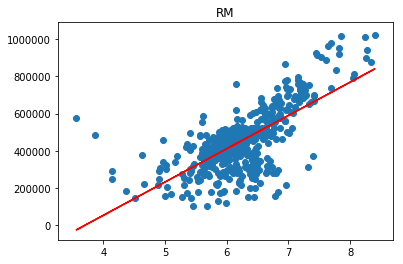

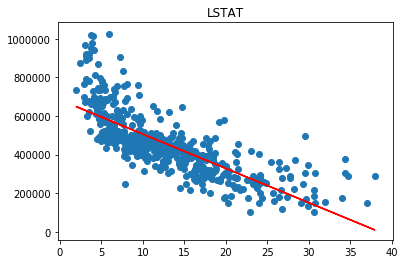

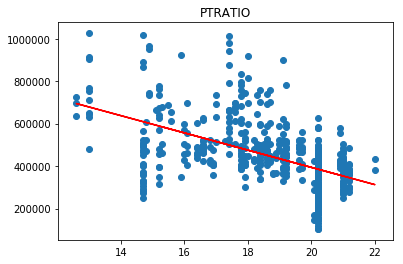

In [3]:
# Plot the data
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
target = prices    
### Linear Regression from Scikit-Learn
model = LinearRegression()
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values.reshape(-1, 1)
    model.fit(x, prices)
    print(model.coef_)
### Data visualization using matplotlib e numpy    
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values
    fig, ax = plt.subplots()
    fit = np.polyfit(x, target , deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    plt.title(variable)
    ax.scatter(x, target )
fig.show()

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
# DONE: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # DONE: Calculate the performance score between 'y_true' and 'y_predict'
        # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

> We got a Result of 0.936, which means we have **93.6%** chance to predict the independent variables using dependent variables.

> I would say this is a pretty good value. If you think about that we have values which are somehow connected to each other and using this values we have a chance of $\approx$ 94% to predict our independent values.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# DONE: Import 'train_test_split'
    # http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.cross_validation import train_test_split

# DONE: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.8, test_size=0.2, random_state=86)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

> We need to train our model somehow for what it is supposed to do.  
For this purpose we create some data for the training and some for the testing, which we are not using until the very last moment.  
With other words, this split helps us also to exclude the future Testdata until we need them without looking at them.
> ### Regarding the over and underfitting.  
Another purpose to split the data is that we can kind of avoiding to learn only for these data and overfit everything.  
Also when we create our metric and compare the test and training data, **wait** ...  
**NEVER use your test data for training**
so not training, I mean cross validation data we see how well the model fits.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

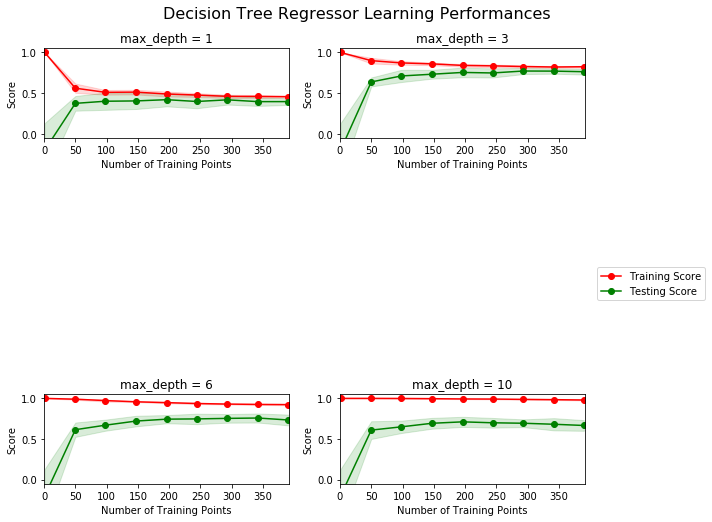

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

> I would choose the Second graph with a _max_depth = 3_  
First we see that we are plotting the Score and not the error, which would be 1-score.  
Then we can assume that the upper **testing_score threshold** might be $\approx$ **80 - 85%**  
In the first graph, with a max_depth of 1 we see that our testing score and training score approximate at 50%.  
In the second graph we see the movement upwards to the $\approx$ 80%. When we increase our depth, the testing_score stays close to this value and stops increasing.  
On the other side, the training_score continues increasing to nearly 100%.  

> _What does this mean?_  
It tells us that we kind of overoptimising our training_score. But it doesn't help us increasing the score of our testing_data.  
Regarding the fact, we prefer to use the model using real data like our test_data, we could stop our max_depth between 3 and 6.  Closer to 3 if the gap between the scores starts to grow. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

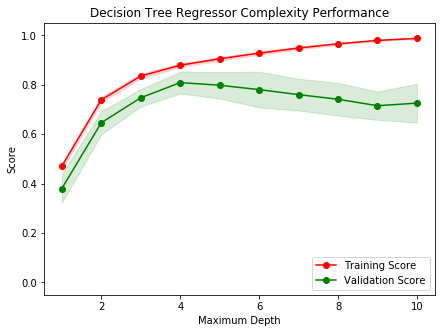

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

> When the model is trained with a **max_depth = 1**, it suffers from a **high bias**, which means that it is underfitting.  
In the other example if we have a **max_depth = 10**, we overfit our model which means **high variance**

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

>Looking at the graph, we see at **max_depth = 1** that our validation and training score close together but at 40-50%.  
The _best_ accurancy can be assumed at **max_depth = 4** because this is the point where the gap between the training and validation score starts to grow and the validation score is declining.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

>The grid search technique is a model optimisation technique.  
This means, we can use different parameters from our model as an input, as well as the model type itself and tune some of our hyperparameters _settings_.  
* First, what is a hyperparameter? A hyperparameter is a parameter which is not direktly learned, it is choosen dependend on the model. An example is for our decicion tree the parameters **max\_depth, min_samples_leaf and min_samples_split** are hyperparameters.  

>We can also define a scoring parameter our Grid Search, depending on this scoring parameter, we can decide which metric we would like to choose for the scoring of our hyper-parameters.  
Wait. Scoring?  
Yep, this means, we have our grid, so think about a kind of table where you have different values on the one axis and different hyper-parameters on the other axis.  
Now we have a lot of options, but how to determine which one is the best? We use the scoring.  
So for example, if we use the _f-score_ method, we could say the parameter combination with the highest f-score is the best, we should choose.  
We are able to use also the $R^2$ or other scores, depending which one we choose or prefer for this kind of model and problem.

>After running this function, we will get some return values, what are the recommendet values for our hyper-parameters, so if we apply them to our model, we can make use of the grid search function and results.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

>When we talk about the k-fold cross-validation, first we have to take a look at the usual process.  
Usually you split your data into test and training data with a certain percentage and run them time (or more but the data are not changing).

>When we use the k-fold cross-validation technique, we kind of split our data, let's say in 20% blocks.  
So we have 5 Blocks, now we define, that 80% are for training and 20% are our test data.  
Using this technique, let's say with a **k of 5**, we rotate 5 times and splitted it in 5 parts, so each time it will build a training set which contains of 4/5 parts and 1/5 of the data will be the test set.  
After each run, one part will be replaced.

>That way we are changing for every fitting our training data slightly but our test data are a new _'unknown'_ block.  
Why _'unknown'_ that way? Because we know the data somehow, but we make kind of crosschecks, so we are able to slightly change our training and might be able to use less training data but get a better test-score result in the end.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# DONE: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # DONE: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # DONE: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': np.arange(1, 11, 1)}

    # DONE: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # DONE: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

>The optimal model has a **max_depth=4**, which is the same as my conclusion earlier, from the _model compexity_ I would have guessed a max_depth of 4, and from the first evaluation I thought between the second and the third plat which gave the range between 3 and 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $406,395.65
Predicted selling price for Client 2's home: $222,450.00
Predicted selling price for Client 3's home: $944,300.00


**Answer: **

>Our model predicted prices:
```
Predicted selling price for Client 1's home: $420,000.00
Predicted selling price for Client 2's home: $214,540.54
Predicted selling price for Client 3's home: $1,018,500.00
```

>From the idea, that the biggest house with the best neighborhood costs the most.  
And the house with the highest poverty rate in the neighborhood and when we look at the rooms it's also the smallest, so it should be the cheapest.  
The first client house is in the middle, so it should be in the middled price of the other two.  
When we look at our predicted results, it seems at least kind of reasonable.

>One part we might investigate a bit further, depending on the low poverty rate and the high total number of rooms as well as the very good student-teacher ratio, this house seems to be one of the top houses.  
When we look at our statistical data from the beginning, we see, that it is very close to the max_price we found out.  
So if there is a lot of "space", so that we might have a house which has 12 rooms and 1% poverty rate, we might look at the data again.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

>### So should or shouldn't we apply this model?  
To answer this question, first evaluate the points:  
* 1978, this is now 40 years back. Since them a lot of things changed, the prices for real estates changed, the education level changed in some areas and as asked, we had some inflation.  
 * The data might be interesting to compare if we would have data from now, to be able to see the change or even if there was any change. The model might be still applicable, because we used some metrics which are still valid nowadays.  
 It could be that if we use some inbetween and new testdata regarding the prices and make a addition for the inflation that we could improve the model to make it possible for predictions today.
 * The inflation is a important factor, so first, in this case we even have to think about the compounding interest rate.  
 This means, the interest rate or in our case the inflation from last year will be added to the next year and so on.  
 The formula looks like $$\text{Amount of Money}\times(1+\text{+interest rate, or inflation})^{\text{Years}}$$  
 An example, if we take our 10 trial **Trial 10: \$413,700.00**, assume a inflation of 3.5% and 40 years, we get:  
 $$413,700 \times 1.035^40 = 1,637,900 \text{ USD}$$  
 So during 40 years, the inflation changed the price $\approx$ with the factor 4.
* From my point of view, the square feet area should be included.  
If you start to include such _'noice'_ like a pool, it might be able to destroy the model.  
Depending on the region, this factor or factors like this are more uncommon, so these are more common to be outliners, than the usual case.
* With a look on the trials, I would say, yes the model is robust enough. The reason why I decided for this answer is, we see that the prices are only slightly change, depending on the max price, of more than one Million, we have a pricerange of 6.9% of that, on the price with 400k it is $\approx$ 15%, so the change isn't so much if you think about that the additional costs for the layer, contract, etc. also have a range of 8.5-12.5%, and these costs are way below the house price itself.
* Mhm I would say it depends on the timeframe, if you use the 40 year old data you collected and use them for a 40 year ago rural city, this might work.  
Otherwise, it will be a bit hard. I expect that there are different key parameters who are important for people who prefer to live in a rural region and/or for people who prefer to live in cities.
* Maybe not fair, but we are used to it and sometimes we can't avoid it.
 * A good example is Johannesburg in South Africa.  
The people there started to kind of invade the city and occupy the appartments. Stopt paying rent, and the property owner will never get it back. And even if they would get it back, there is no option to sell it, because of the neighborhood.
 * Another very contraire example is Mexico City, usually close to the Military the expensive houses are, and short after the very poor regions.
 * As a conclusion I would say, it is all in all good, and it prevents some integrity of people. But we should think about that it might not be fair everytime we think about it.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.